# Get Data

In [1]:
from data_processing.stock_Pre_Processing import stock_Pre_Processing
from data_processing.calculate_reward import calculate_reward

# Name of 5 Stocks  
stocks = ["khodro", "shabendar", "shapna", "vnaft", "zamyad"]
print(f"Number of Stocks: {len(stocks)}")

# Getting Data
start = "2001-07-10"
end = "2022-04-29"

for stock in stocks:
    # Preprocess data
    Hour = stock_Pre_Processing(stock, start, end, "60m")
    Day = stock_Pre_Processing(stock, start, end, "1d")
    Week = stock_Pre_Processing(stock, start, end, "1wk")
    
    # Reset indexes
    Hour.reset_index(drop=True, inplace=True)
    Day.reset_index(drop=True, inplace=True)
    Week.reset_index(drop=True, inplace=True)
    
    # Adding rewards to datasets
    Hour = calculate_reward(stock,Hour)
    Day = calculate_reward(stock,Day)
    Week = calculate_reward(stock,Week)

    # Save the datasets
    PATH = "datasets/FA_StockPrices/"
    Hour.to_csv(f"{PATH}{stock}_hour.csv", index=False)
    Day.to_csv(f"{PATH}{stock}_day.csv", index=False)
    Week.to_csv(f"{PATH}{stock}_week.csv", index=False)

Number of Stocks: 5


# DQN Model

In [1]:
from models.deep_q_trading_model import DeepQTradingModel
from utils.preprocessing import preprocess_data
from data.data_loader import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from models.deep_q_trading_model import DeepQTradingModel
from utils.preprocessing import preprocess_data
from data.data_loader import DataLoader

if __name__ == '__main__':
    # Set your parameters
    stocks = ['vnaft', 'zamyad', 'khodro', 'shabendar', 'shapna']
    begin_date = '2010-01-01'
    end_date = '2019-02-22'
    test_size = 180
    validation_size = 180
    epochs = 100
    train_size = 1800

    # Initialize DeepQTradingModel
    model = DeepQTradingModel(epochs, train_size)

    for stock in stocks:
        # Load data
        data_loader = DataLoader(begin_date, end_date, test_size, validation_size, train_size)
        X_train, X_val, X_test, y_train, y_val, y_test, RoR = data_loader.load_data(stock)

        # Preprocess data
        X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test = \
            model.preprocess_data(X_train, X_val, X_test, y_train, y_val, y_test)

        # Train models and save
        lstm_results, gru_results, combined_results = model.train_model(X_train_scaled, X_val_scaled, y_train, y_val, stock)




Processing data for vnaft...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Models saved successfully.
Processing data for zamyad...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Models saved successfully.
Processing data for khodro...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Models saved successfully.
Processing data for shabendar...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Models saved successfully.
Processing data for shapna...


Models saved successfully.


Processing data for vnaft...


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0087


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0580


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0192  
Results for vnaft:

LSTM Metrics:
    Loss: 0.009736954234540462
    MSE: 0.005555555555555556
    RMSE: 0.07453559924999299
    MAE: 0.005555555555555556
    MAPE: 450.16737153452107
    RoR: -6.784430584700662
    Return: -100.0
    DD: [ 0.         0.        15.6452109 15.6452109 15.6452109 15.6452109
 15.6452109 15.6452109 15.6452109 15.6452109  0.        15.6452109
  0.         0.         0.         0.        15.6452109  0.
  0.        15.6452109 15.6452109 15.6452109 15.6452109 15.6452109
 15.6452109  0.        15.6452109  0.        15.6452109 15.6452109
 15.6452109 15.6452109  0.         0.        15.6452109  0.
  0.         0.        15.6452109  0.         0.        15.6452109
 15.6452109 15.6452109 15.6452109  0.        15.6452109 15.6452109
 15.6452109  0.        15.6452109  0.        15.6452109 15.6452109
 15.6452109 15.6452109 15.6452109 15.6452109 15.6452109 1

c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100


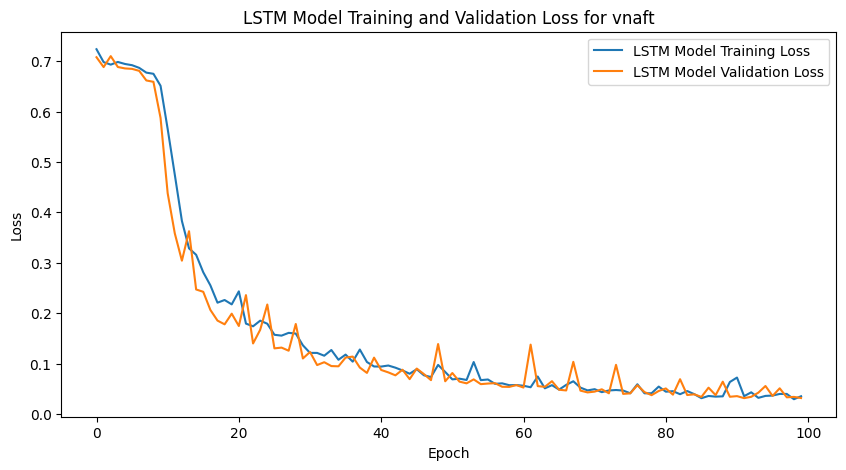

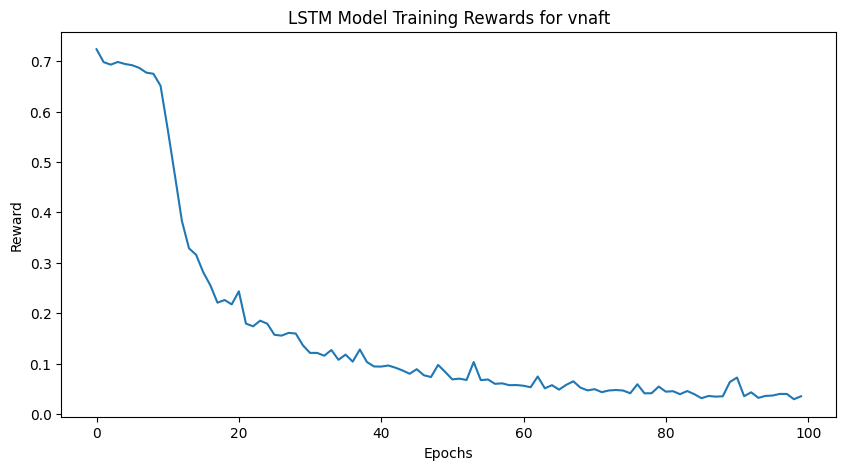

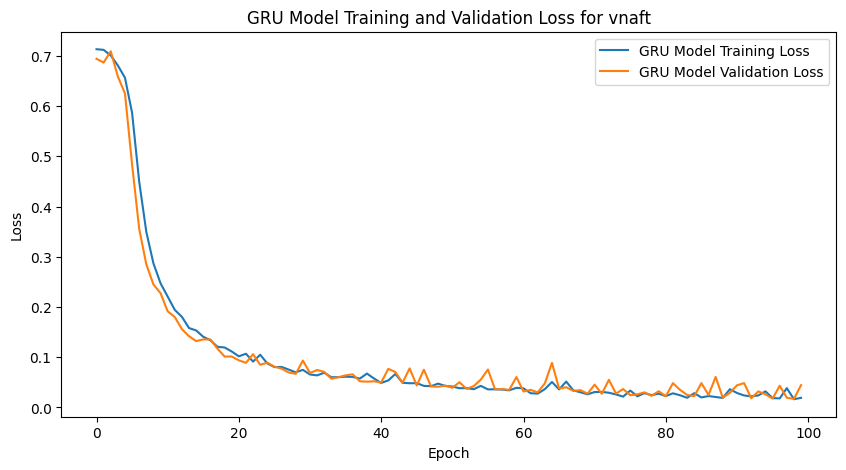

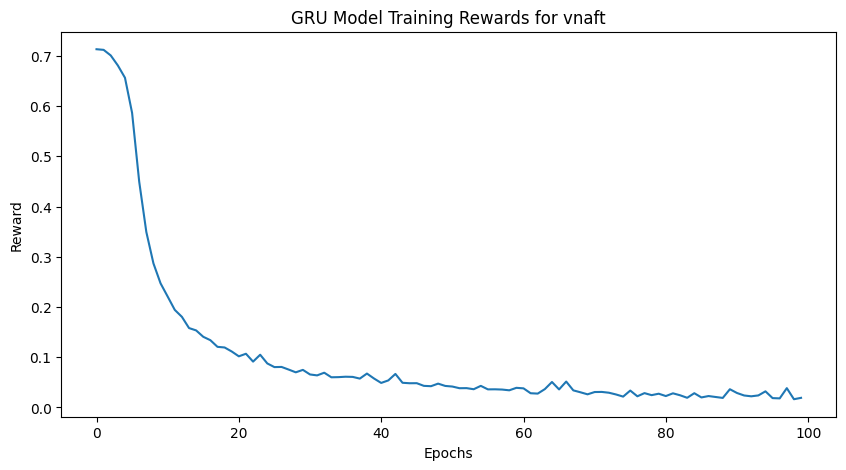

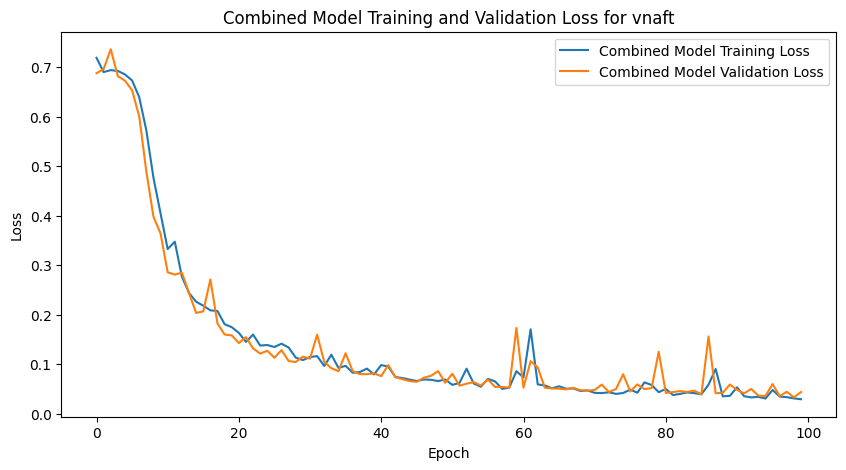

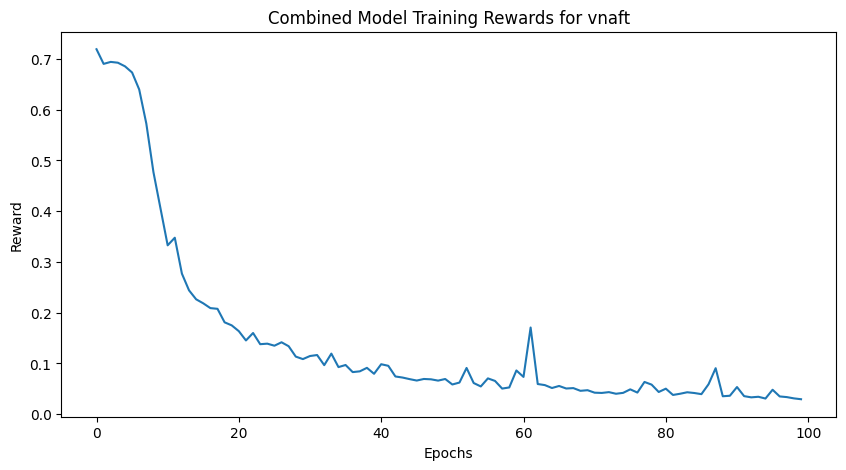

Processing data for zamyad...


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0030    


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: divide by zero encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.5326e-05  


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: divide by zero encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.4373e-04  
Results for zamyad:

LSTM Metrics:
    Loss: 0.004368435125797987
    MSE: 0.012340496284416311
    RMSE: 0.5299257042650412
    MAE: 0.008463213036631058
    MAPE: 435.6618252325189
    RoR: -2.552366162682736
    Return: -25.479358953538338
    DD: 21.06026407174495
    Sharpe Ratio: 1.2661736041832077

GRU Metrics:
    Loss: 5.199177758186124e-05
    MSE: 0.016643554475063264
    RMSE: 0.5773405764737893
    MAE: 0.00662839744741668
    MAPE: 409.5405755883781
    RoR: 2.992394326072297
    Return: -91.4173052665008
    DD: 29.50584754014034
    Sharpe Ratio: 1.1986715218373927

Combined Metrics:
    Loss: 0.0012724543921649456
    MSE: 0.02253549420645196
    RMSE: 1.5719557554929495
    MAE: 0.0046334262765971865
    MAPE: 490.3496135856751
    RoR: 14.855871885582427
    Return: 4.348332972729182
    DD: 45.72506629418609
    Sharpe Ratio: 1.5070966710459532


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: divide by zero encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) 

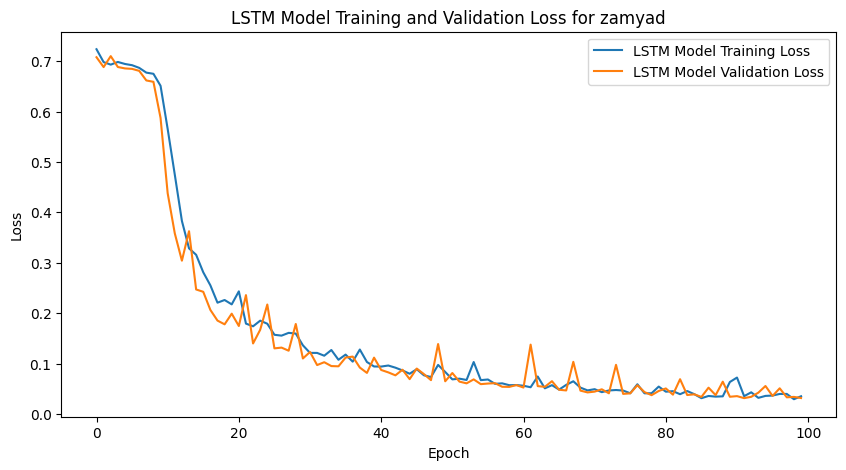

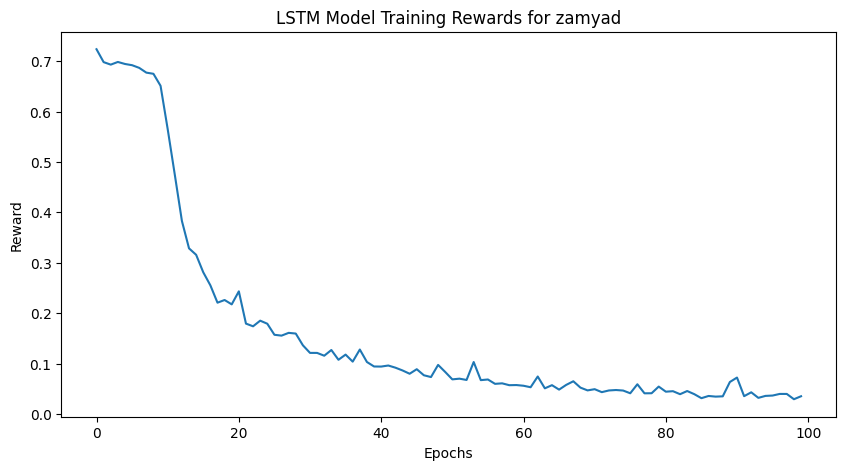

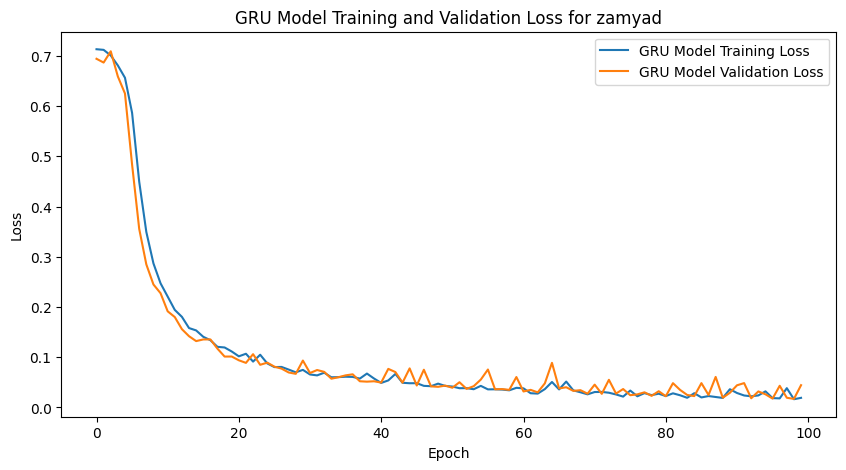

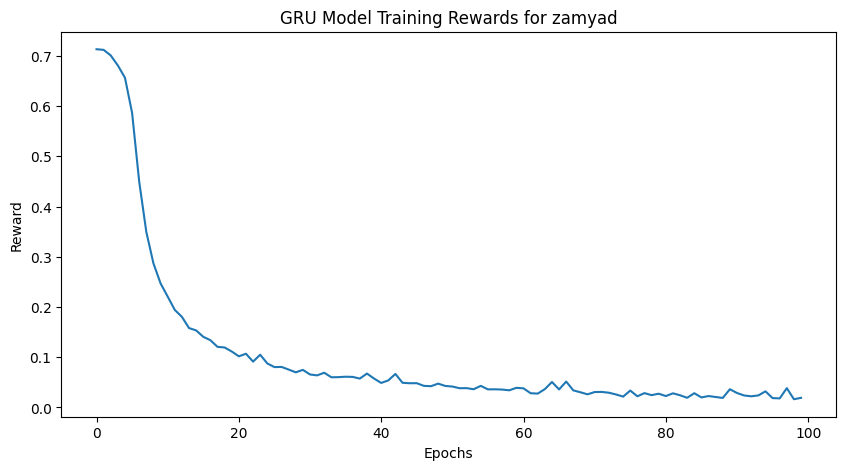

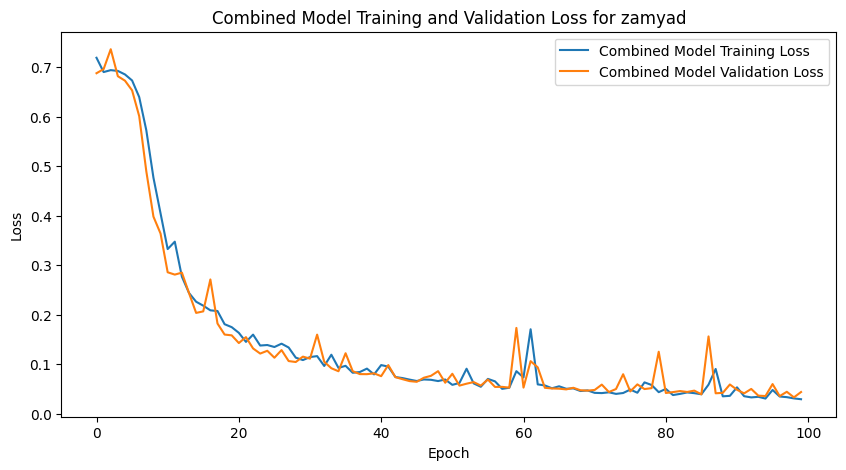

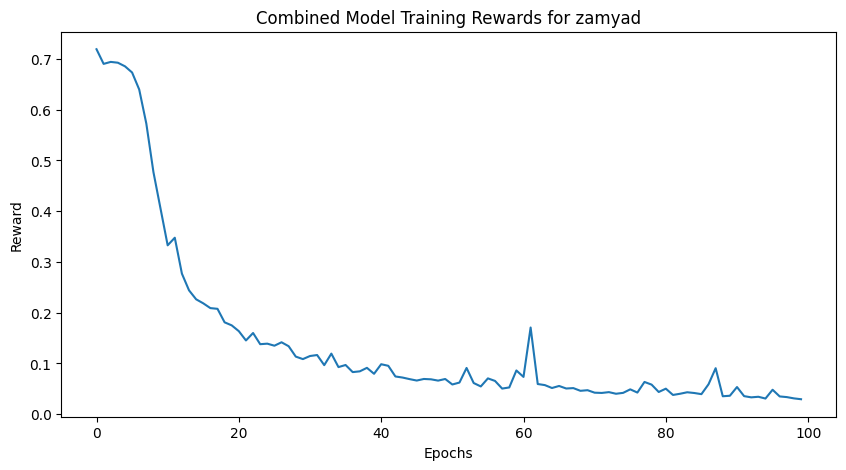

Processing data for khodro...


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0026


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: invalid value encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) *

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0084  


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: invalid value encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) *

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0070  
Results for khodro:

LSTM Metrics:
    Loss: 0.0023177138064056635
    MSE: 0.013092297075980948
    RMSE: 0.8620322325847388
    MAE: 0.005591349001380578
    MAPE: 469.4125129960991
    RoR: -11.189097598252573
    Return: 14.931019054150724
    DD: 12.396414796821976
    Sharpe Ratio: 1.1699772581880088

GRU Metrics:
    Loss: 0.007441490422934294
    MSE: 0.0089369806136518
    RMSE: 0.9827834262904426
    MAE: 0.003511926108663732
    MAPE: 502.00496695575424
    RoR: -12.839776692094306
    Return: 80.19190962299137
    DD: 34.705027512896855
    Sharpe Ratio: 1.008069398015234

Combined Metrics:
    Loss: 0.006093282718211412
    MSE: 0.028619183041599338
    RMSE: 0.19063786954962195
    MAE: 0.009483523229379941
    MAPE: 503.6614083050073
    RoR: 15.569730557697824
    Return: -58.09698485002255
    DD: 28.81837907297381
    Sharpe Ratio: 1.1144054328156656


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: invalid value encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) *

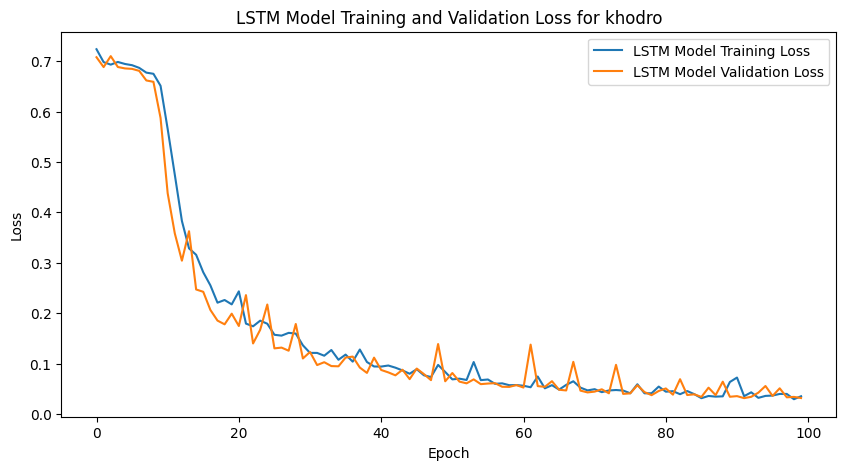

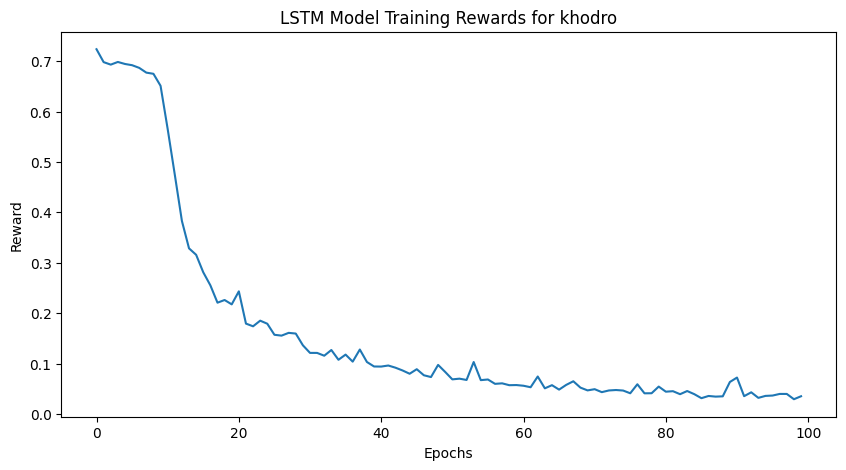

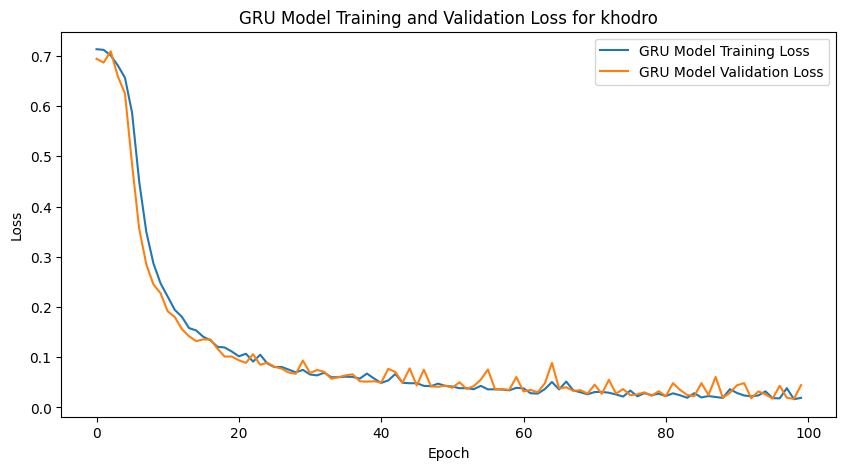

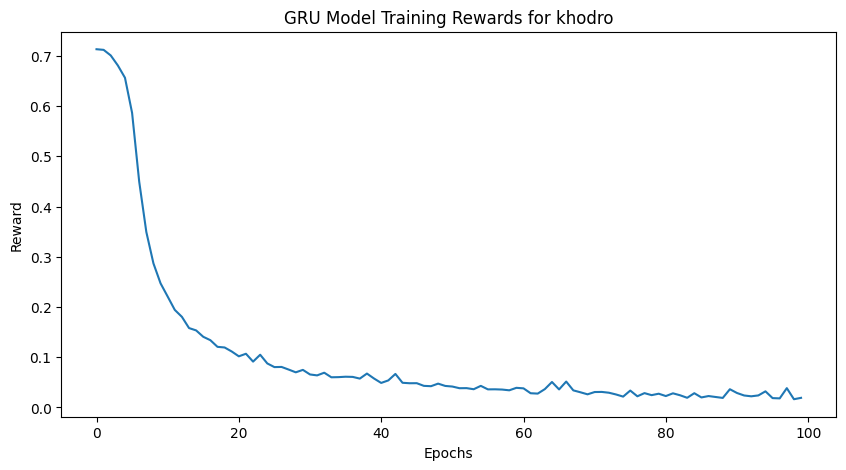

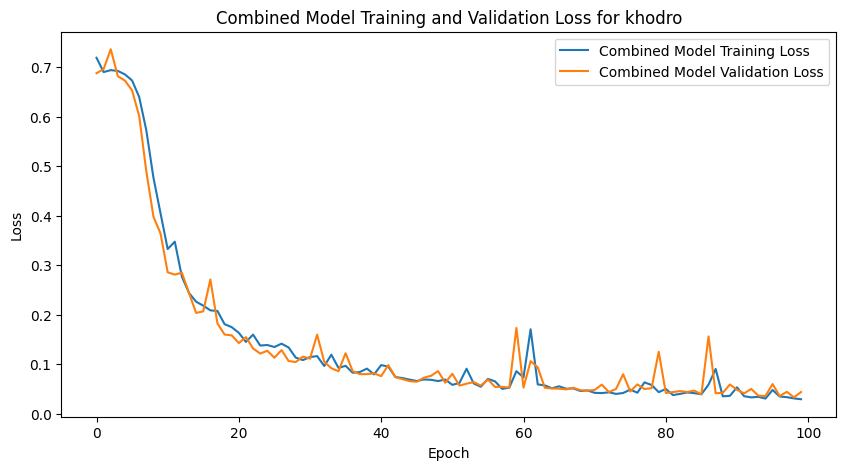

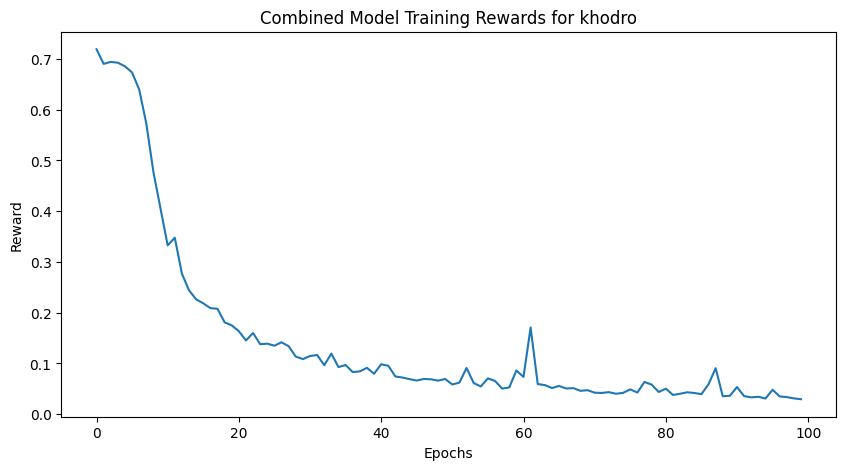

Processing data for shabendar...


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9973 - loss: 0.0133


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: divide by zero encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9973 - loss: 0.0063  


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: divide by zero encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0121  
Results for shabendar:

LSTM Metrics:
    Loss: 0.013100575655698776
    MSE: 0.002777777777777778
    RMSE: 0.05270462766947299
    MAE: 0.002777777777777778
    MAPE: 428.12250056371374
    RoR: 0.0
    Return: 0.0
    DD: [ 0.          0.         17.99731232  0.          0.         17.99731232
  0.         17.99731232 17.99731232  0.          0.          0.
  0.          0.          0.          0.         17.99731232  0.
  0.         17.99731232  0.          0.         17.99731232  0.
  0.         17.99731232  0.          0.          0.         17.99731232
  0.          0.          0.         17.99731232  0.         17.99731232
  0.         17.99731232 17.99731232 17.99731232 17.99731232 17.99731232
 17.99731232 17.99731232  0.         17.99731232 17.99731232 17.99731232
 17.99731232  0.          0.         17.99731232 17.99731232 17.99731232
 17.99731232  0.          0

c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) * 100


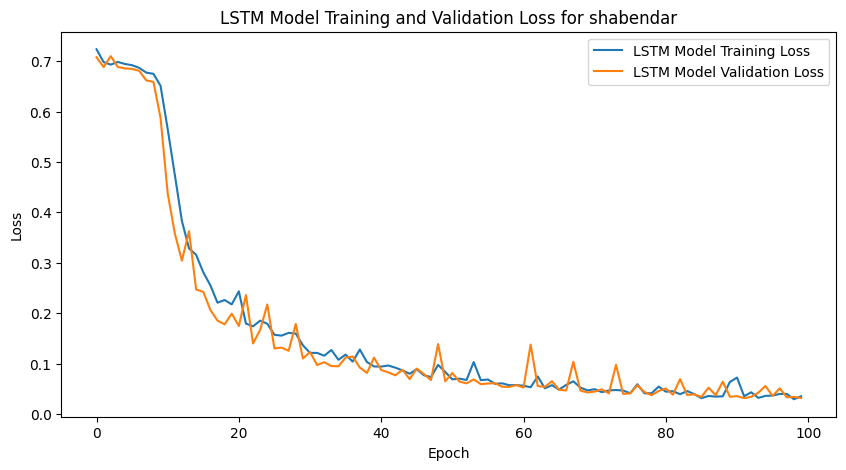

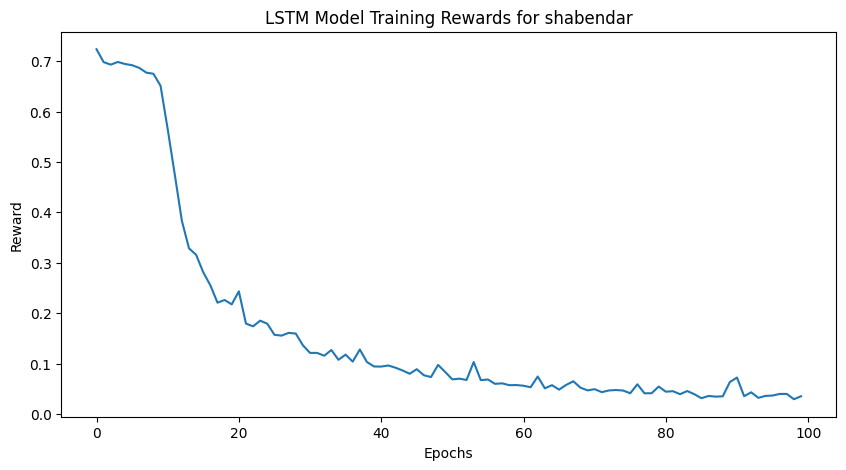

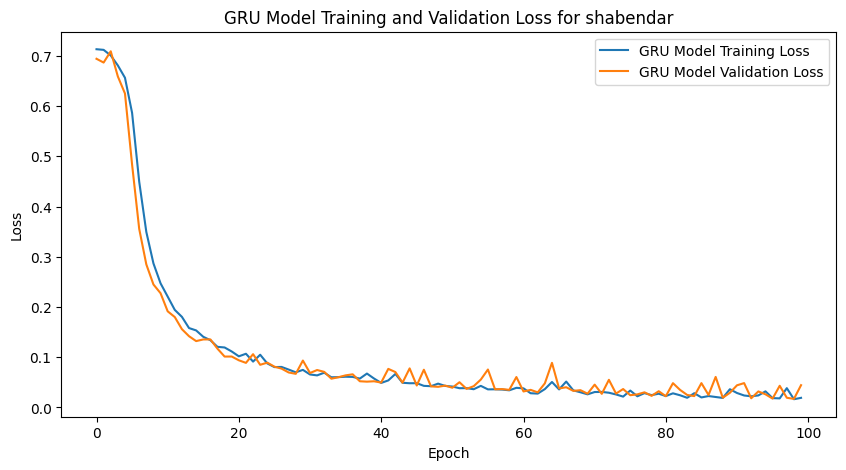

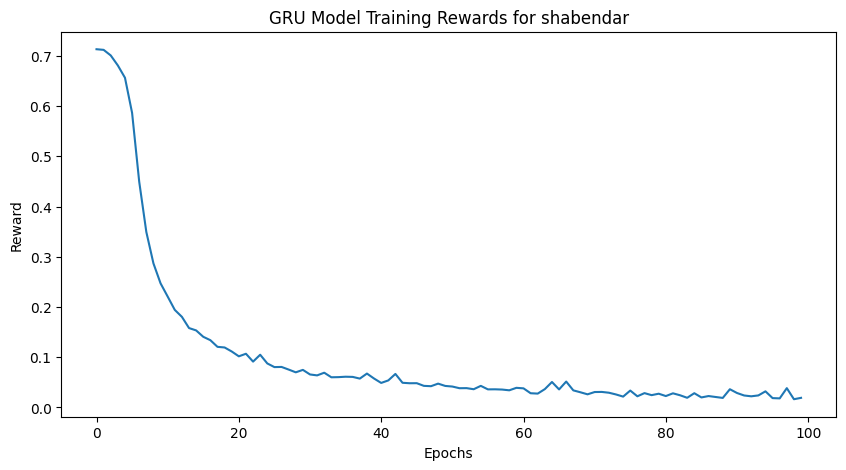

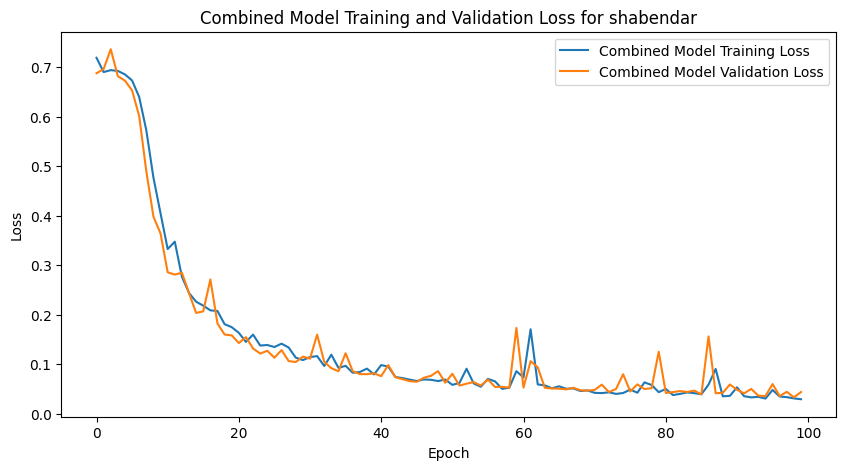

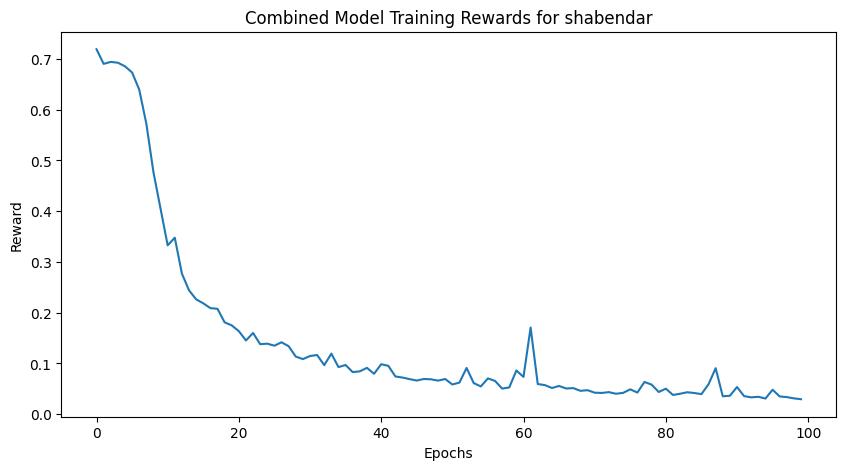

Processing data for shapna...


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9901 - loss: 0.0247  


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: invalid value encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: invalid value encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) *

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0101  


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: invalid value encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: divide by zero encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0166  
Results for shapna:

LSTM Metrics:
    Loss: 0.021638236939907074
    MSE: 0.005555555555555556
    RMSE: 0.07453559924999299
    MAE: 0.005555555555555556
    MAPE: 428.94539751868547
    RoR: 6.953678025960226
    Return: -25.280424480359855
    DD: 47.122053733492976
    Sharpe Ratio: 1.2082881455210714

GRU Metrics:
    Loss: 0.018350737169384956
    MSE: 0.019444444444444445
    RMSE: 0.13944333775567927
    MAE: 0.001393392792543395
    MAPE: 492.83798186105787
    RoR: -1.8304239592460654
    Return: -31.97140172650157
    DD: 66.49428756317928
    Sharpe Ratio: 1.0421295817255054

Combined Metrics:
    Loss: 0.02270360291004181
    MSE: 0.019444444444444445
    RMSE: 0.13944333775567927
    MAE: 0.009460703803187009
    MAPE: 476.09011121037804
    RoR: -10.932638523037717
    Return: 51.97454850684122
    DD: 83.28264752377638
    Sharpe Ratio: 1.2902168324781655


c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:123: RuntimeWarning: invalid value encountered in scalar divide
  returns = (y_test[-1] - y_test[0]) / y_test[0] * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:127: RuntimeWarning: invalid value encountered in divide
  drawdown = ((max_return - y_test) / max_return) * 100
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: divide by zero encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:132: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(y_test) / y_test[:-1]
c:\Users\ASUS\Documents\GitHub\DQL\models\deep_q_trading_model.py:139: RuntimeWarning: divide by zero encountered in divide
  mape = np.nan if np.sum(np.abs(y_test)) == 0 else np.mean(np.abs((np.argmax(y_test_encoded, axis=1) - np.argmax(y_pred, axis=1)) / np.argmax(y_test_encoded, axis=1))) 

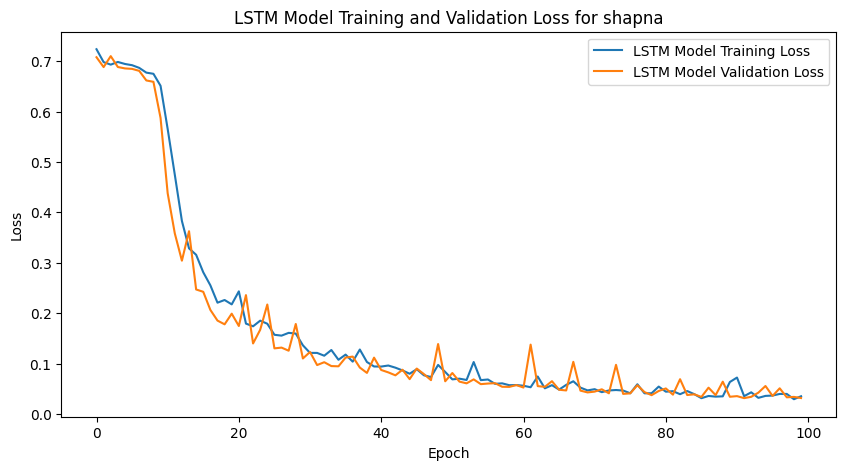

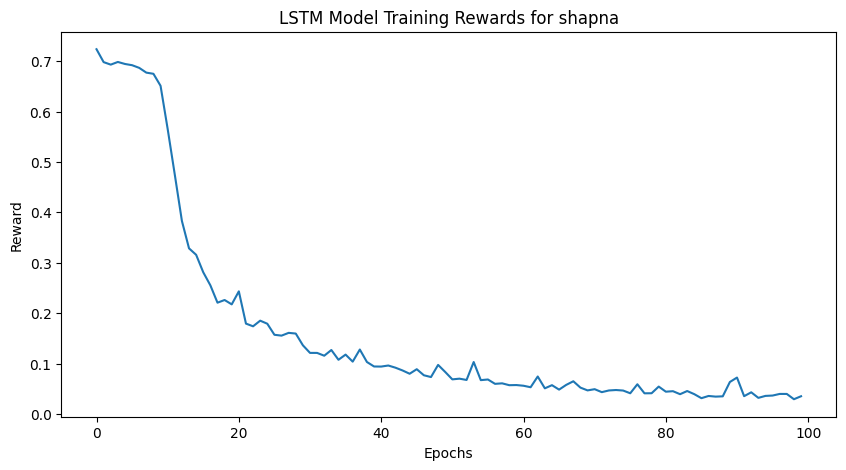

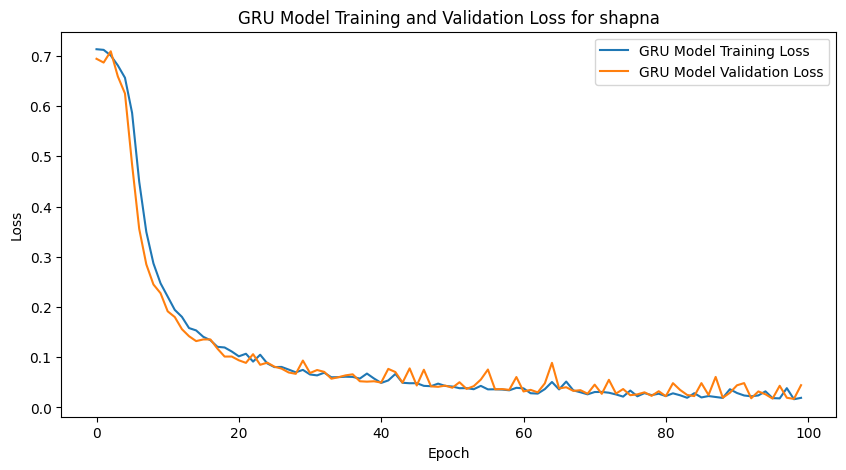

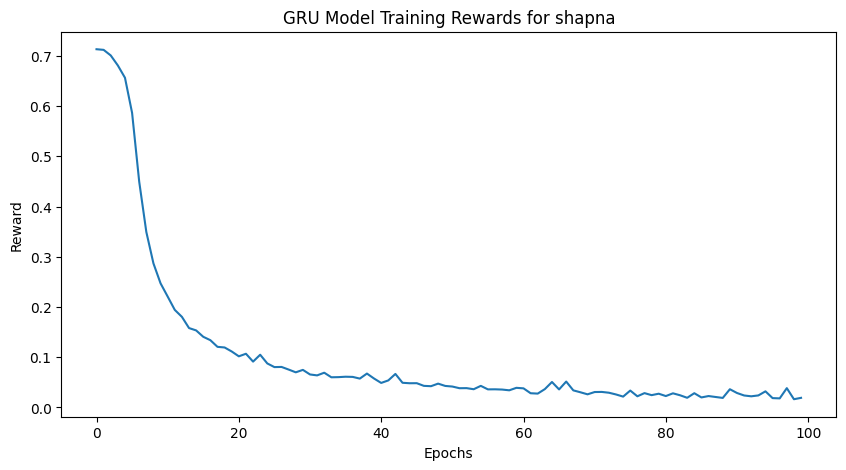

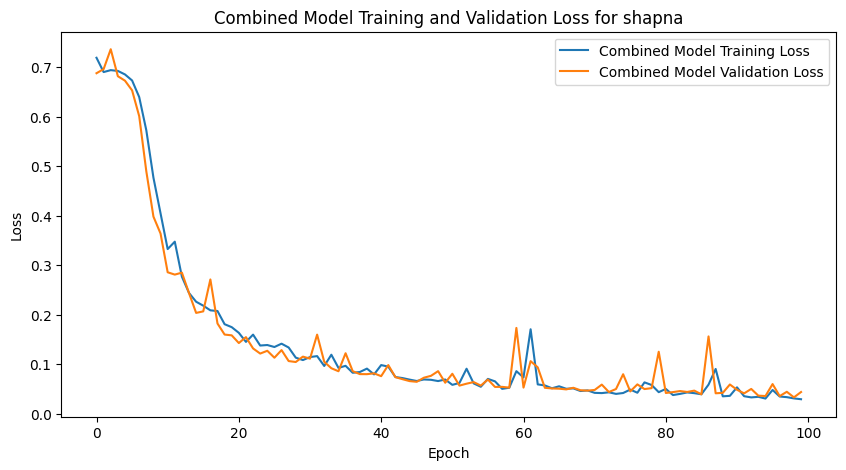

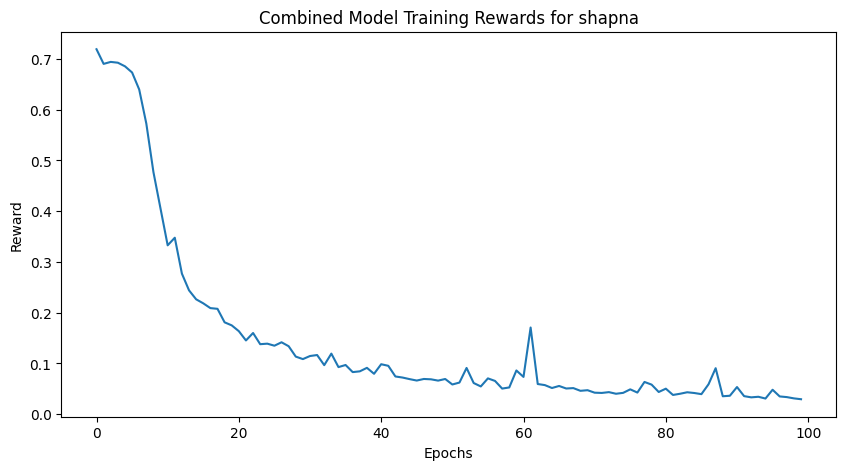

In [2]:
from models.deep_q_trading_model import DeepQTradingModel
from utils.preprocessing import preprocess_data
from data.data_loader import DataLoader

if __name__ == '__main__':
    # Set your parameters
    stocks = ['vnaft', 'zamyad', 'khodro', 'shabendar', 'shapna']
    begin_date = '2010-01-01'
    end_date = '2019-02-22'
    test_size = 180
    validation_size = 180
    epochs = 100
    train_size = 1800

    # Initialize DeepQTradingModel
    model = DeepQTradingModel(epochs, train_size)

    for stock in stocks:
        # Load data
        data_loader = DataLoader(begin_date, end_date, test_size, validation_size, train_size)
        X_train, X_val, X_test, y_train, y_val, y_test, RoR = data_loader.load_data(stock)

        # Preprocess data
        X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test = \
            model.preprocess_data(X_train, X_val, X_test, y_train, y_val, y_test)

        # Load models and perform analysis
        lstm_model = model.load_model(f"output/model/{stock}_lstm_model.h5")
        gru_model = model.load_model(f"output/model/{stock}_gru_model.h5")
        combined_model = model.load_model(f"output/model/{stock}_combined_model.h5")

        lstm_loss_metrics = model.evaluate_model(lstm_model, X_test_scaled, y_test)
        gru_loss_metrics = model.evaluate_model(gru_model, X_test_scaled, y_test)
        combined_loss_metrics = model.evaluate_model(combined_model, X_test_scaled, y_test)

        model.print_results(stock, lstm_loss_metrics, gru_loss_metrics, combined_loss_metrics)
        model.plot_results(stock, lstm_results, gru_results, combined_results)
